#Analisis Sentimen Pemilu Menggunakan Feature Selection Chi Squared dan Metode Oversampling SMOTE Menggunakan Algoritma Naive Bayes

### Import Library

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import recall_score, precision_score, f1_score
import joblib

### Import Dataset

In [ ]:
# Baca dataset
dataset = pd.read_excel('lexicon_result_final.xlsx')  # Pastikan file Excel berada di direktori yang benar
dataset

,publishedAt,comment,sentiment,label
0,19/09/2023 15:24,ganjar unggul gagas,5,positif
1,19/09/2023 15:24,prabowo,0,netral
2,19/09/2023 15:24,kandidat ganjar pranowo calon presiden ideal p...,3,positif
3,19/09/2023 15:24,allin allin prabowo,10,positif
4,19/09/2023 15:24,dukung kuat ganjar positif,10,positif
...,...,...,...,...
36274,18/11/2023 08:42,assalamualaikum mbak najwa iqbal zul aqli aceh...,6,positif
36275,18/11/2023 08:48,prabowo subianto cinta nkri,3,positif
36276,18/11/2023 10:30,praktek sila pancasila nkri prabowo subianto c...,5,positif
36277,18/11/2023 20:46,assalamualaikum mbak najwa iqbal zul aqli aceh...,6,positif


In [ ]:
# Hitung jumlah data duplikat
num_duplicates = dataset.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 34


In [ ]:
# Hapus data duplikat
dataset.drop_duplicates(inplace=True)

In [ ]:
# Cek missing dataset
print(dataset['comment'].isnull().sum())

0


In [ ]:
# Cek perbandingan label
dataset.label.value_counts()

positif    21311
negatif     8851
netral      6083
Name: label, dtype: int64

In [ ]:
# Cek type data pada kolom 'comment'
print(dataset['comment'].dtype)

object


In [ ]:
# Ubah tipe dataset pada kolom 'comment'
dataset['comment'] = dataset['comment'].astype(str)

### Dataset Spliting

In [ ]:
# Pisahkan data menjadi data latih dan data uji
X = dataset['comment']
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitur Ekstraksi Dengan TF-IDF

In [ ]:
# Konversi teks menjadi vektor fitur menggunakan TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Dapatkan nama fitur (kata) dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi matriks TF-IDF ke DataFrame untuk data latih
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
df_train_tfidf

,aa,aaa,aaaaaaamiiinnnn,aaaaaaannnnnnnnnniiiiiiiiiiiiieeeeeeeeeessssssss,aaaaaamiiiiiin,aaaaaannnnnnnnnniiiiiiiiiieeeeeeeesssssssssssssssssssssssssssssssssss,aaaaaat,aaaaamiiiiin,aaaah,aaaamii,...,zul,zulfikar,zulkarnain,zulkarnainbetul,zulkarnainotak,zulkarnainwkwkwkwk,zulkifli,zx,zzzzzz,zzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection Chi Squared

In [ ]:
# Tambahkan feature selection dengan chi-squared
selector = SelectKBest(chi2, k=10000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)

# Dapatkan index fitur terbaik
selected_features_index = selector.get_support(indices=True)

# Dapatkan skor chi-squared untuk fitur-fitur yang dipilih
chi2_scores = selector.scores_[selected_features_index]

# Dapatkan p-value untuk fitur-fitur yang dipilih
p_values = selector.pvalues_[selected_features_index]

# Dapatkan nama fitur yang dipilih
feature_names = tfidf.get_feature_names_out()[selected_features_index]

# Buat DataFrame dari fitur yang dipilih, skor chi-squared, dan p-value
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Chi-Squared Score': chi2_scores,
    'P-value': p_values
})

# Urutkan DataFrame berdasarkan skor chi-squared tertinggi
feature_scores_sorted = feature_scores.sort_values(by='Chi-Squared Score', ascending=False)

# Tampilkan DataFrame yang sudah diurutkan
feature_scores_sorted

,Feature,Chi-Squared Score,P-value
1462,buzzer,546.339192,2.311808e-119
697,baik,253.830953,7.608672e-56
7045,pilih,244.889458,6.651657e-54
5146,mantap,204.618075,3.696151e-45
6559,omong,168.229120,2.947887e-37
...,...,...,...
6497,observasi,0.615087,7.352509e-01
6056,ngdabrus,0.614903,7.353184e-01
3889,kadar,0.614880,7.353271e-01
6590,opsi,0.614756,7.353726e-01


### Handle Imbalanced Dengan Teknik Oversampling (SMOTE)

In [ ]:
# Menerapkan SMOTE pada data latih saja
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Perbandingan label sebelum dan sesudah SMOTE
label_comparison_before = y_train.value_counts()
label_comparison_after = pd.Series(y_train_resampled).value_counts()

print("Label Distribution Before SMOTE:")
print(label_comparison_before)
print("\nLabel Distribution After SMOTE:")
print(label_comparison_after)

Label Distribution Before SMOTE:
positif    17011
negatif     7076
netral      4909
Name: label, dtype: int64

Label Distribution After SMOTE:
negatif    17011
positif    17011
netral     17011
Name: label, dtype: int64


### Klasifikasi Naive Bayes Dengan Split Validation 20%

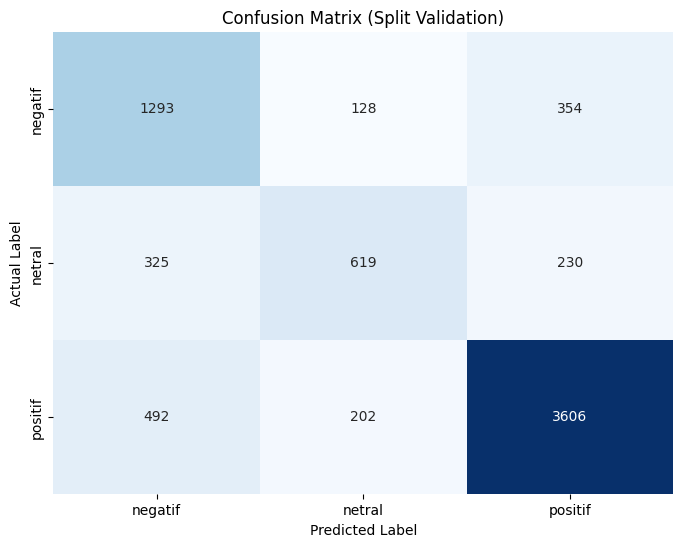

Accuracy after SMOTE and feature selection: 0.76
Confusion Matrix:
[[1293  128  354]
 [ 325  619  230]
 [ 492  202 3606]]
Classification Report:
              precision    recall  f1-score   support

     negatif       0.61      0.73      0.67      1775
      netral       0.65      0.53      0.58      1174
     positif       0.86      0.84      0.85      4300

    accuracy                           0.76      7249
   macro avg       0.71      0.70      0.70      7249
weighted avg       0.77      0.76      0.76      7249


Recall: 0.76
Precision: 0.77
F1-score: 0.76
Accuracy: 0.76


In [ ]:
# Inisialisasi model Naive Bayes (ComplementNB)
nb_model_1 = ComplementNB()

# Melatih model Naive Bayes dengan data yang sudah di-resampling
nb_model_1.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred = nb_model_1.predict(X_test_tfidf[:, selected_features_index])  # Memilih fitur yang sama seperti pada data latih

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Mendapatkan nama label dari dataset
labels = sorted(y_test.unique())

# Membuat DataFrame confusion matrix dengan nama label
confusion_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Visualisasi tabel confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Split Validation)')
plt.show()

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after SMOTE and feature selection: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Mendapatkan classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Menghitung nilai recall, precision, f1-score secara manual
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mencetak nilai recall, precision, f1-score, dan akurasi
print(f"\nRecall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

### Split Validation Data Testing 10%

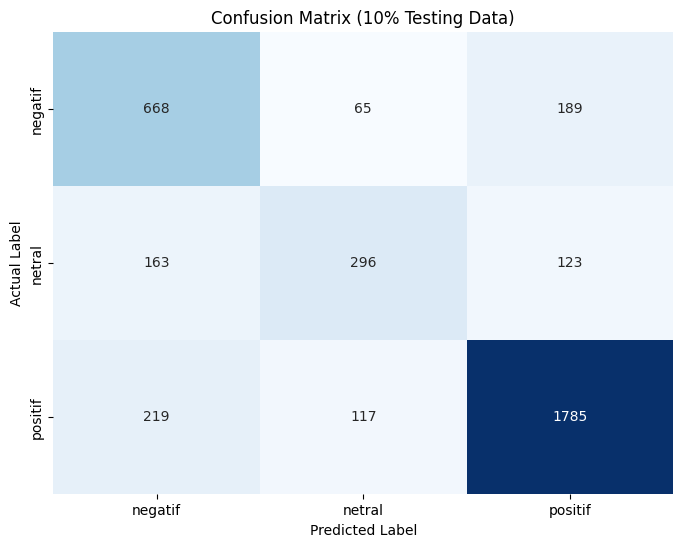

Accuracy after SMOTE and feature selection (10% Testing Data): 0.76
Confusion Matrix:
[[ 668   65  189]
 [ 163  296  123]
 [ 219  117 1785]]
Classification Report:
              precision    recall  f1-score   support

     negatif       0.64      0.72      0.68       922
      netral       0.62      0.51      0.56       582
     positif       0.85      0.84      0.85      2121

    accuracy                           0.76      3625
   macro avg       0.70      0.69      0.69      3625
weighted avg       0.76      0.76      0.76      3625


Recall: 0.76
Precision: 0.76
F1-score: 0.76
Accuracy: 0.76


In [ ]:
# Pisahkan data menjadi data latih dan data uji (90% latih, 10% uji)
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Konversi teks menjadi vektor fitur menggunakan TF-IDF
tfidf_10 = TfidfVectorizer()
X_train_tfidf_90 = tfidf_10.fit_transform(X_train_90)
X_test_tfidf_10 = tfidf_10.transform(X_test_10)

# Tambahkan feature selection dengan chi-squared
selector = SelectKBest(chi2, k=10000)
X_train_selected_90 = selector.fit_transform(X_train_tfidf_90, y_train_90)

# Dapatkan index fitur terbaik
selected_features_index_90 = selector.get_support(indices=True)

# Dapatkan skor chi-squared untuk fitur-fitur yang dipilih
chi2_scores_90 = selector.scores_[selected_features_index_90]

# Dapatkan p-value untuk fitur-fitur yang dipilih
p_values_90 = selector.pvalues_[selected_features_index_90]

# Dapatkan nama fitur yang dipilih
feature_names_90 = tfidf_10.get_feature_names_out()[selected_features_index_90]

# Buat DataFrame dari fitur yang dipilih, skor chi-squared, dan p-value
feature_scores_90 = pd.DataFrame({
    'Feature': feature_names_90,
    'Chi-Squared Score': chi2_scores_90,
    'P-value': p_values_90
})

# Urutkan DataFrame berdasarkan skor chi-squared tertinggi
feature_scores_sorted_90 = feature_scores_90.sort_values(by='Chi-Squared Score', ascending=False)

# Menerapkan SMOTE pada data latih saja
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_90, y_train_resampled_90 = smote.fit_resample(X_train_selected_90, y_train_90)

# Inisialisasi model Naive Bayes (ComplementNB)
nb_model_90 = ComplementNB()

# Melatih model Naive Bayes dengan data yang sudah di-resampling
nb_model_90.fit(X_train_resampled_90, y_train_resampled_90)

# Melakukan prediksi pada data uji (10%)
y_pred_10 = nb_model_90.predict(X_test_tfidf_10[:, selected_features_index_90])

# Confusion matrix
conf_matrix_10 = confusion_matrix(y_test_10, y_pred_10)

# Mendapatkan nama label dari dataset
labels_10 = sorted(y_test_10.unique())

# Membuat DataFrame confusion matrix dengan nama label
confusion_df_10 = pd.DataFrame(conf_matrix_10, index=labels_10, columns=labels_10)

# Visualisasi tabel confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_10, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (10% Testing Data)')
plt.show()

# Evaluasi model
accuracy_10 = accuracy_score(y_test_10, y_pred_10)
print(f'Accuracy after SMOTE and feature selection (10% Testing Data): {accuracy_10:.2f}')

conf_matrix_10 = confusion_matrix(y_test_10, y_pred_10)
print('Confusion Matrix:')
print(conf_matrix_10)

# Mendapatkan classification report
classification_rep_10 = classification_report(y_test_10, y_pred_10)
print("Classification Report:")
print(classification_rep_10)

# Menghitung nilai recall, precision, f1-score secara manual
recall_10 = recall_score(y_test_10, y_pred_10, average='weighted')
precision_10 = precision_score(y_test_10, y_pred_10, average='weighted')
f1_10 = f1_score(y_test_10, y_pred_10, average='weighted')

# Mencetak nilai recall, precision, f1-score, dan akurasi
print(f"\nRecall: {recall_10:.2f}")
print(f"Precision: {precision_10:.2f}")
print(f"F1-score: {f1_10:.2f}")
print(f"Accuracy: {accuracy_10:.2f}")


### Split Validation Data Testing 30%

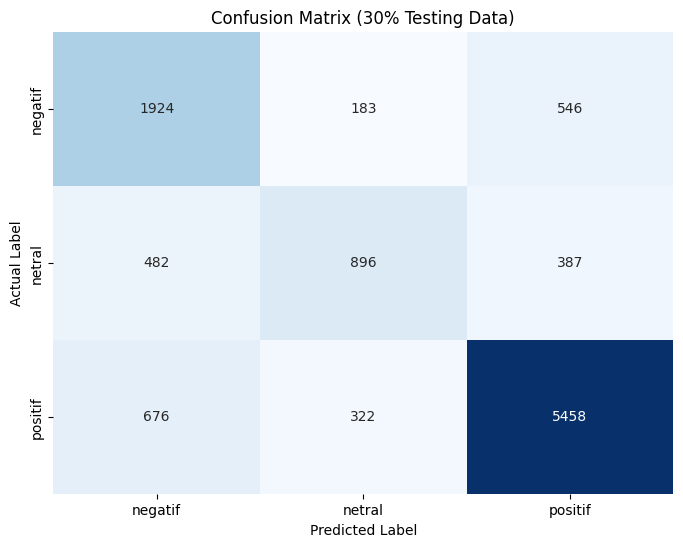

Accuracy after SMOTE and feature selection (30% Testing Data): 0.76
Classification Report (30% Testing Data):
              precision    recall  f1-score   support

     negatif       0.62      0.73      0.67      2653
      netral       0.64      0.51      0.57      1765
     positif       0.85      0.85      0.85      6456

    accuracy                           0.76     10874
   macro avg       0.71      0.69      0.70     10874
weighted avg       0.76      0.76      0.76     10874


Recall: 0.76
Precision: 0.76
F1-score: 0.76
Accuracy: 0.76


In [ ]:
# Pisahkan data menjadi data latih dan data uji (70% latih, 30% uji)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Konversi teks menjadi vektor fitur menggunakan TF-IDF
tfidf_30 = TfidfVectorizer()
X_train_tfidf_70 = tfidf_30.fit_transform(X_train_70)
X_test_tfidf_30 = tfidf_30.transform(X_test_30)

# Tambahkan feature selection dengan chi-squared
selector = SelectKBest(chi2, k=10000)
X_train_selected_70 = selector.fit_transform(X_train_tfidf_70, y_train_70)

# Dapatkan index fitur terbaik
selected_features_index_70 = selector.get_support(indices=True)

# Dapatkan skor chi-squared untuk fitur-fitur yang dipilih
chi2_scores_70 = selector.scores_[selected_features_index_70]

# Dapatkan p-value untuk fitur-fitur yang dipilih
p_values_70 = selector.pvalues_[selected_features_index_70]

# Dapatkan nama fitur yang dipilih
feature_names_70 = tfidf_30.get_feature_names_out()[selected_features_index_70]

# Buat DataFrame dari fitur yang dipilih, skor chi-squared, dan p-value
feature_scores_70 = pd.DataFrame({
    'Feature': feature_names_70,
    'Chi-Squared Score': chi2_scores_70,
    'P-value': p_values_70
})

# Urutkan DataFrame berdasarkan skor chi-squared tertinggi
feature_scores_sorted_70 = feature_scores_70.sort_values(by='Chi-Squared Score', ascending=False)

# Menerapkan SMOTE pada data latih saja
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_70, y_train_resampled_70 = smote.fit_resample(X_train_selected_70, y_train_70)

# Inisialisasi model Naive Bayes (ComplementNB)
nb_model_70 = ComplementNB()

# Melatih model Naive Bayes dengan data yang sudah di-resampling
nb_model_70.fit(X_train_resampled_70, y_train_resampled_70)

# Melakukan prediksi pada data uji (30%)
y_pred_30 = nb_model_70.predict(X_test_tfidf_30[:, selected_features_index_70])

# Confusion matrix
conf_matrix_30 = confusion_matrix(y_test_30, y_pred_30)

# Mendapatkan nama label dari dataset
labels = sorted(y_test_30.unique())

# Membuat DataFrame confusion matrix dengan nama label
confusion_df_30 = pd.DataFrame(conf_matrix_30, index=labels, columns=labels)

# Visualisasi tabel confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_30, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (30% Testing Data)')
plt.show()

# Evaluasi model
accuracy_30 = accuracy_score(y_test_30, y_pred_30)
print(f'Accuracy after SMOTE and feature selection (30% Testing Data): {accuracy_30:.2f}')

# Mendapatkan classification report
classification_rep_30 = classification_report(y_test_30, y_pred_30)
print("Classification Report (30% Testing Data):")
print(classification_rep_30)

# Menghitung nilai recall, precision, f1-score secara manual
recall_30 = recall_score(y_test_30, y_pred_30, average='weighted')
precision_30 = precision_score(y_test_30, y_pred_30, average='weighted')
f1_30 = f1_score(y_test_30, y_pred_30, average='weighted')

# Mencetak nilai recall, precision, f1-score, dan akurasi
print(f"\nRecall: {recall_30:.2f}")
print(f"Precision: {precision_30:.2f}")
print(f"F1-score: {f1_30:.2f}")
print(f"Accuracy: {accuracy_30:.2f}")

### Klasifikasi Dan Evaluasi Naive Bayes Dengan Croos Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Inisialisasi model Naive Bayes (ComplementNB)
nb_model = ComplementNB()

# Latih model dengan data latih
nb_model.fit(X_train_resampled, y_train_resampled)

# Lakukan cross-validation dengan StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists untuk menyimpan nilai evaluasi dari setiap fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    # Latih model pada fold tertentu
    nb_model.fit(X_train_fold, y_train_fold)

    # Prediksi pada data uji fold
    y_pred_fold = nb_model.predict(X_test_fold)

    # Evaluasi performa pada fold tertentu
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold, average='weighted')
    recall_fold = recall_score(y_test_fold, y_pred_fold, average='weighted')
    f1_fold = f1_score(y_test_fold, y_pred_fold, average='weighted')

    # Simpan nilai evaluasi pada list
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)

# Hitung rata-rata dari setiap metrik evaluasi
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Menampilkan hasil evaluasi
evaluation_df = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

print("Evaluasi dari Setiap Fold:")
print(evaluation_df)

# Menampilkan rata-rata evaluasi dari keseluruhan fold
print("\nRata-rata Evaluasi dari Keseluruhan Fold:")
print(f"Accuracy: {avg_accuracy:.2f}")
print(f"Precision: {avg_precision:.2f}")
print(f"Recall: {avg_recall:.2f}")
print(f"F1-score: {avg_f1:.2f}")

Evaluasi dari Setiap Fold:
   Fold  Accuracy  Precision    Recall  F1-score
0     1  0.840909   0.843539  0.840909  0.840985
1     2  0.839538   0.841757  0.839538  0.839666
2     3  0.843848   0.847670  0.843848  0.844214
3     4  0.837743   0.841116  0.837743  0.837597
4     5  0.842250   0.846527  0.842250  0.842511
5     6  0.846169   0.848935  0.846169  0.846438
6     7  0.839898   0.843607  0.839898  0.840045
7     8  0.842642   0.846357  0.842642  0.842784
8     9  0.844797   0.847850  0.844797  0.844841
9    10  0.837743   0.840460  0.837743  0.837872

Rata-rata Evaluasi dari Keseluruhan Fold:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-score: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix

# Lists untuk menyimpan confusion matrix dari setiap fold
confusion_matrices = []

for train_index, test_index in skf.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    # Latih model pada fold tertentu
    nb_model.fit(X_train_fold, y_train_fold)

    # Prediksi pada data uji fold
    y_pred_fold = nb_model.predict(X_test_fold)

    # Evaluasi performa pada fold tertentu
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)

    # Simpan confusion matrix pada list
    confusion_matrices.append(conf_matrix_fold)

# Hitung confusion matrix rata-rata dari keseluruhan fold
avg_conf_matrix = sum(confusion_matrices) // len(confusion_matrices)

# Menampilkan confusion matrix dari setiap fold
print("Confusion Matrix dari Setiap Fold:")
for i, cm in enumerate(confusion_matrices, 1):
    print(f"\nFold ke-{i}:")
    print(cm)

# Menampilkan confusion matrix rata-rata dari keseluruhan fold
print("\nConfusion Matrix Rata-rata dari Keseluruhan Fold:")
print(avg_conf_matrix)


Confusion Matrix dari Setiap Fold:

Fold ke-1:
[[1490   58  154]
 [ 171 1364  166]
 [ 160  103 1438]]

Fold ke-2:
[[1446   82  173]
 [ 166 1371  164]
 [ 144   90 1468]]

Fold ke-3:
[[1481   64  156]
 [ 177 1375  150]
 [ 181   69 1451]]

Fold ke-4:
[[1491   58  152]
 [ 193 1328  180]
 [ 146   99 1456]]

Fold ke-5:
[[1488   48  165]
 [ 185 1356  160]
 [ 166   81 1454]]

Fold ke-6:
[[1474   68  159]
 [ 153 1386  162]
 [ 165   78 1458]]

Fold ke-7:
[[1487   63  151]
 [ 172 1351  178]
 [ 173   80 1448]]

Fold ke-8:
[[1479   55  167]
 [ 184 1353  164]
 [ 149   84 1468]]

Fold ke-9:
[[1474   65  162]
 [ 169 1357  175]
 [ 136   85 1480]]

Fold ke-10:
[[1475   67  159]
 [ 189 1361  151]
 [ 163   99 1439]]

Confusion Matrix Rata-rata dari Keseluruhan Fold:
[[1478   62  159]
 [ 175 1360  165]
 [ 158   86 1456]]


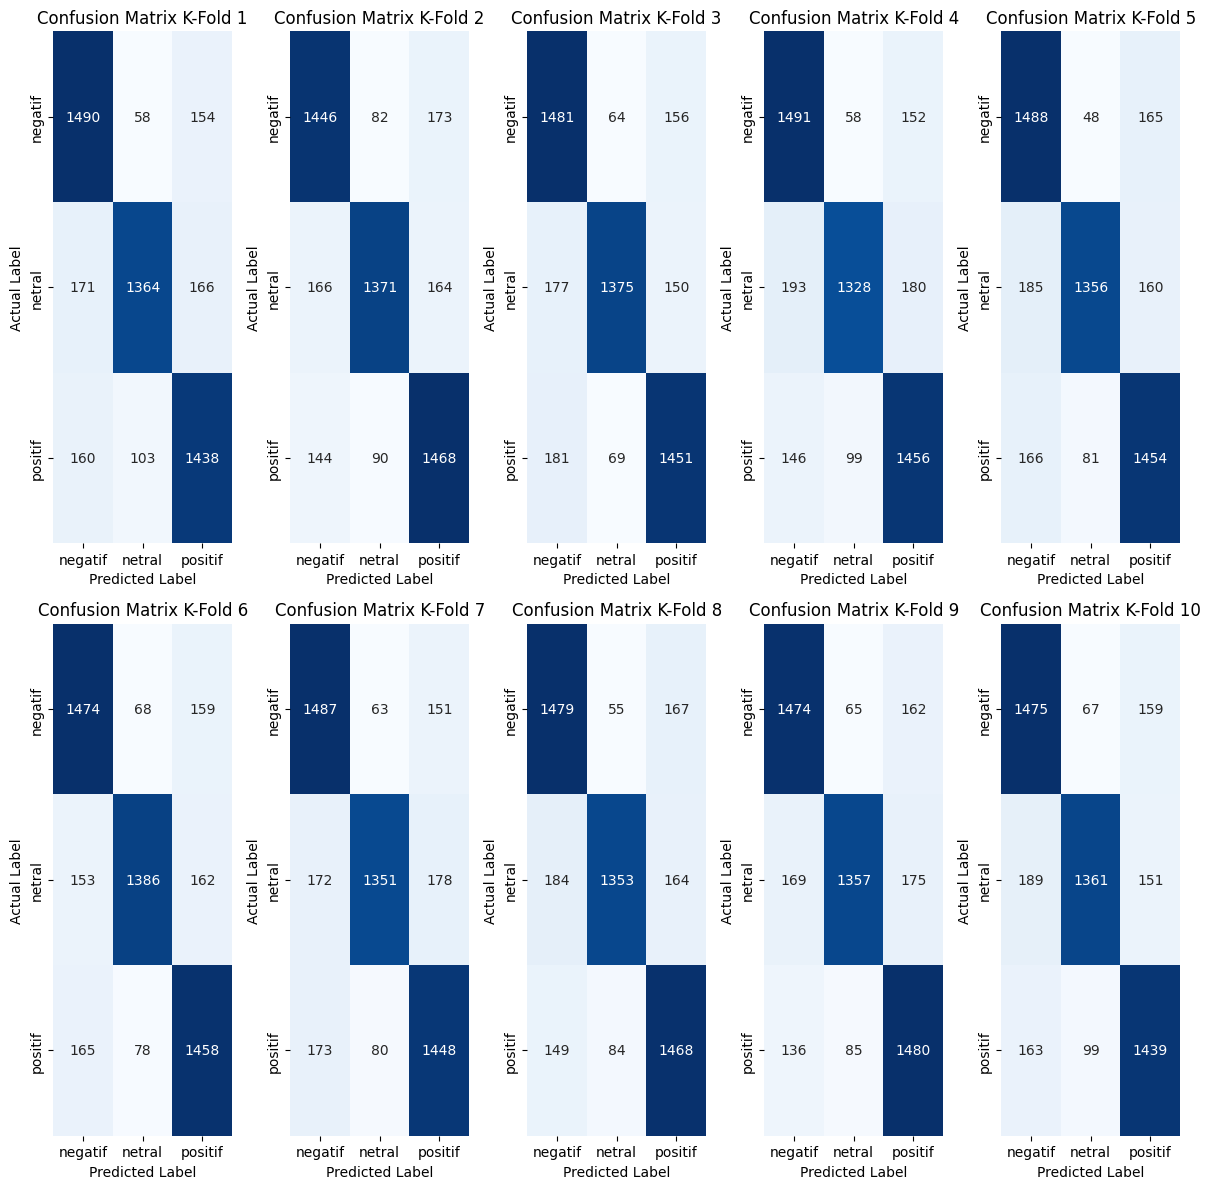

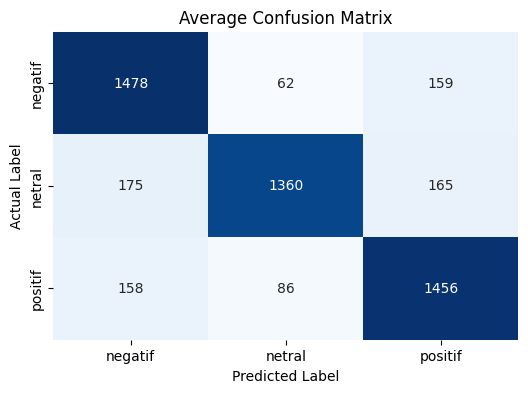

In [ ]:
# Fungsi untuk menampilkan confusion matrix sebagai heatmap
def plot_confusion_matrix(cm, ax, title):
    labels = sorted(y_train_resampled.unique())  # Label yang diinginkan, disusun secara ascending
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(title)

# Menampilkan grafik confusion matrix dari setiap fold
plt.figure(figsize=(12, 12))
for i, cm in enumerate(confusion_matrices, 1):
    plt.subplot(2, 5, i)
    plot_confusion_matrix(cm, plt.gca(), f'Confusion Matrix K-Fold {i}')
    plt.tight_layout()

plt.show()

# Menampilkan grafik confusion matrix rata-rata dari keseluruhan fold
plt.figure(figsize=(6, 4))
plot_confusion_matrix(avg_conf_matrix, plt.gca(), 'Average Confusion Matrix')
plt.show()


### Prediksi Teks Terhadap Model yang sudah di prediksi (Split validation)

In [ ]:
# Fungsi untuk prediksi teks baru
def predict_new_text(text):
    # Konversi teks baru menjadi vektor fitur menggunakan TF-IDF
    new_text_tfidf = tfidf_10.transform([text])

    # Pilih fitur yang sama dengan yang telah dipilih pada data latih
    X_new_text_selected = new_text_tfidf[:, selected_features_index_90]

    # Lakukan prediksi pada teks baru dengan fitur yang dipilih
    prediction = nb_model_90.predict(X_new_text_selected)
    return prediction

# Contoh penggunaan fungsi untuk prediksi teks baru
new_text = "prabowo subianto cinta nkri"
predicted_label = predict_new_text(new_text)
print(f'Predicted Label for New Text: {predicted_label}')


Predicted Label for New Text: ['positif']


### Prediksi Teks Terhadap Model yang sudah di prediksi (Croos validation)

In [ ]:
# Fungsi untuk melakukan prediksi pada teks baru dengan fitur yang sama
def predict_new_text(text):
    # Konversi teks baru menjadi vektor fitur menggunakan TF-IDF dengan fitur yang dipilih pada training
    text_tfidf = tfidf.transform([text])[:, selected_features_index]

    # Prediksi label pada teks baru
    predicted_label = nb_model.predict(text_tfidf)
    return predicted_label

# Contoh penggunaan fungsi untuk prediksi teks baru
new_text = "prabowo subianto cinta nkri"
predicted_label = predict_new_text(new_text)
print(f'Predicted Label for New Text: {predicted_label}')


Predicted Label for New Text: ['positif']


### Save dan Load Model

In [ ]:
# Simpan model ke file
joblib.dump(nb_model, 'model_naive_bayes_CV_10.pkl')

['model_naive_bayes_CV_10.pkl']

In [ ]:
# Memuat model dari file
loaded_model = joblib.load('model_naive_bayes_CV_10.pkl')